In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:

for dirname, _, filenames in os.walk(r'C:\Users\ULTRAPC\Desktop\DL\Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\ULTRAPC\Desktop\DL\Data\train.csv
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\export.pkl
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\0024cdab0c1e.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\00cb6555d108.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\0124dffecf29.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\01b3aed3ed4c.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\0369f3efe69b.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\03e25101e8e8.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\04ac765f91a1.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\059bc89df7f4.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\05a5183c92d0.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\0684311afdfc.png
C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images\Mild\06b71823f9cd.png
C:\Users

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Using the Image Data Generator 

In [4]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory(r'C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory(r'C:\Users\ULTRAPC\Desktop\DL\Data\gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


## Now, let us try Efficient Net

Google recently published both a very exciting paper and source code for a newly designed CNN (convolutional neural network) called EfficientNet, that set new records for both accuracy and computational efficiency.
This was not a minor improvement but rather an accuracy improvement of up to 6% while on the order of 5–10x more efficient than most current CNN’s. 

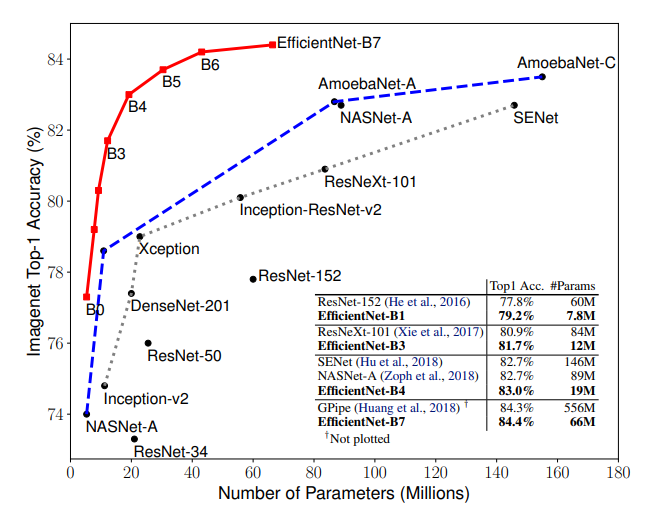

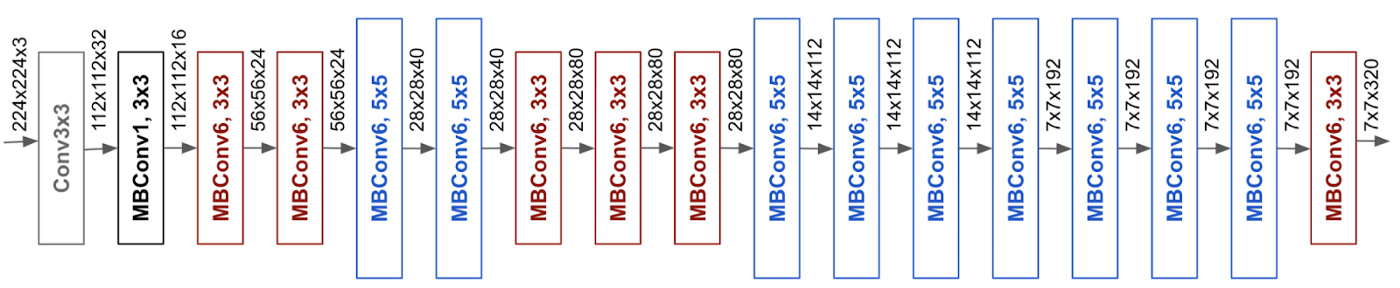

## Using EfficientNet for Transfer Learning

In [5]:
!pip install -q efficientnet

In [6]:
import efficientnet.tfkeras as efn
import scipy

In [8]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


In [9]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [10]:
history=model.fit_generator(train_data,validation_data =epochs=40,verbose=1)

C:\Users\ULTRAPC\AppData\Local\Temp\ipykernel_9032\2872359742.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)


Epoch 1/40
92/92 [==============================] - 49s 415ms/step - loss: 1.0470 - acc: 0.6513 - val_loss: 1.0573 - val_acc: 0.5732 - lr: 1.0000e-04
Epoch 2/40
92/92 [==============================] - 22s 233ms/step - loss: 0.7553 - acc: 0.7233 - val_loss: 0.9197 - val_acc: 0.6744 - lr: 1.0000e-04
Epoch 3/40
92/92 [==============================] - 22s 233ms/step - loss: 0.6558 - acc: 0.7550 - val_loss: 0.8555 - val_acc: 0.7305 - lr: 1.0000e-04
Epoch 4/40
92/92 [==============================] - 22s 233ms/step - loss: 0.5860 - acc: 0.7827 - val_loss: 0.6959 - val_acc: 0.7798 - lr: 1.0000e-04
Epoch 5/40
92/92 [==============================] - 22s 233ms/step - loss: 0.5810 - acc: 0.7885 - val_loss: 0.6067 - val_acc: 0.7483 - lr: 1.0000e-04
Epoch 6/40
92/92 [==============================] - 22s 233ms/step - loss: 0.5192 - acc: 0.8045 - val_loss: 0.5875 - val_acc: 0.7784 - lr: 1.0000e-04
Epoch 7/40
92/92 [==============================] - 22s 233ms/step - loss: 0.4986 - acc: 0.8161 - va

In [11]:
import matplotlib.pyplot as plt

In [12]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

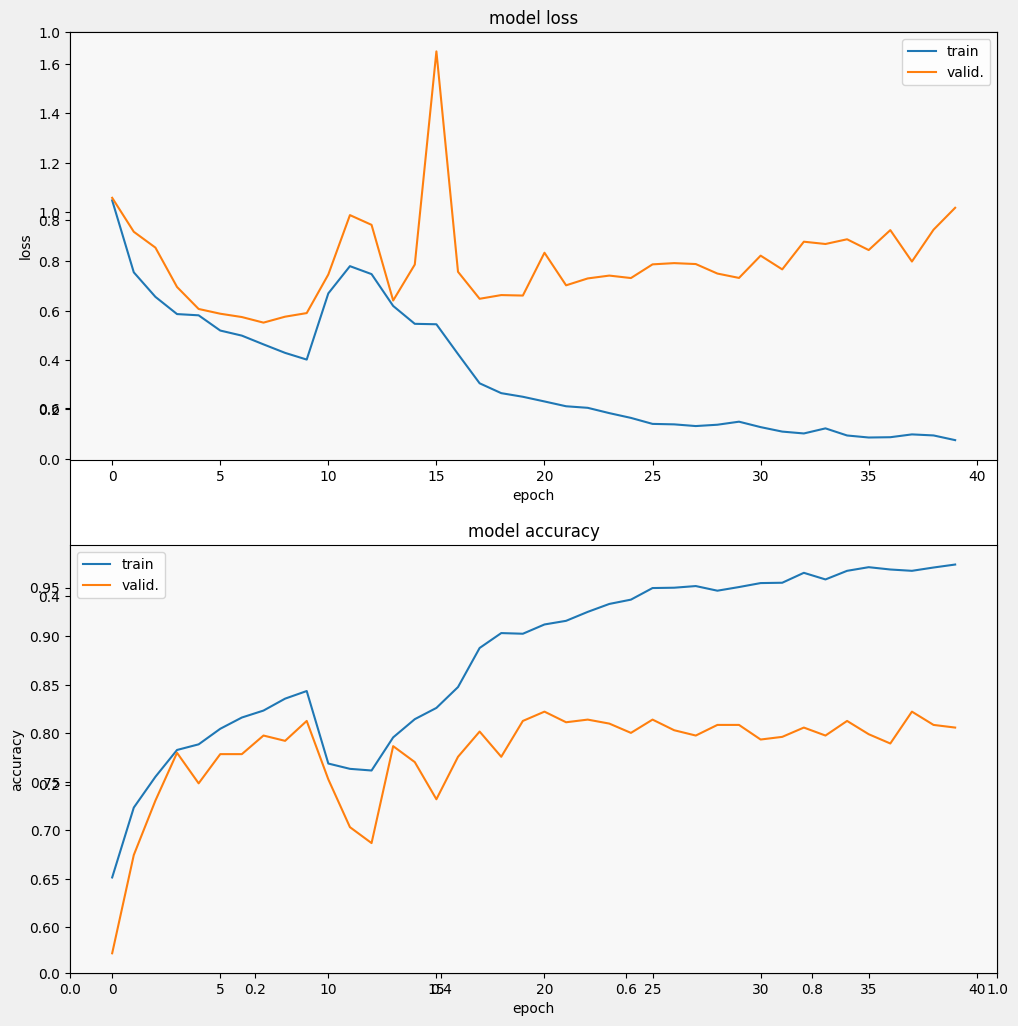

In [13]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

In [ ]:
model.save(r"C:\Users\ULTRAPC\Desktop\DL\Model\eff.h5")